# State Data

In this exercise, we will be examining the "state" dataset, which has data from the 1970s on all fifty US states. For each state, the dataset includes the population, per capita income, illiteracy rate, murder rate, high school graduation rate, average number of frost days, area, latitude and longitude, division the state belongs to, region the state belongs to, and two-letter abbreviation.

statedata (CSV):

This dataset has 50 observations (one for each US state) and the following 15 variables:

Population - the population estimate of the state in 1975
Income - per capita income in 1974
Illiteracy - illiteracy rates in 1970, as a percent of the population
Life.Exp - the life expectancy in years of residents of the state in 1970
Murder - the murder and non-negligent manslaughter rate per 100,000 population in 1976 
HS.Grad - percent of high-school graduates in 1970
Frost - the mean number of days with minimum temperature below freezing from 1931–1960 in the capital or a large city of the state
Area - the land area (in square miles) of the state
state.abb - a 2-letter abreviation for each state
state.area - the area of each state, in square miles
x - the longitude of the center of the state
y - the latitude of the center of the state
state.division - the division each state belongs to (New England, Middle Atlantic, South Atlantic, East South Central, West South Central, East North Central, West North Central, Mountain, or Pacific)
state.name - the full names of each state
state.region - the region each state belong to (Northeast, South, North Central, or West)

In [231]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics
from scipy import stats
import seaborn as sns
import math

%matplotlib inline

In [232]:
statedata = pd.read_csv('statedata.csv')

# Data Exploration

In [233]:
statedata.head()

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,Alabama,South
1,365,6315,1.5,69.31,11.3,66.7,152,566432,AK,589757,-127.2500,49.2500,Pacific,Alaska,West
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,AZ,113909,-111.6250,34.2192,Mountain,Arizona,West
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,AR,53104,-92.2992,34.7336,West South Central,Arkansas,South
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,CA,158693,-119.7730,36.5341,Pacific,California,West


We begin by exploring the data. We plot all of the states' centers with latitude on the y axis (the "y" variable in our dataset) and longitude on the x axis (the "x" variable in our dataset). The shape of the plot looks like the outline of the United States! Note that Alaska and Hawaii have their coordinates adjusted to appear just off of the west coast.

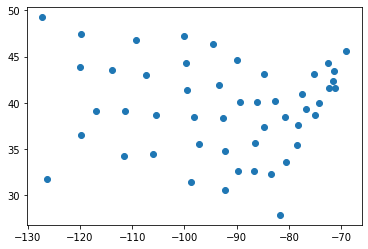

In [234]:
plt.scatter(statedata['x'],statedata['y'])

Now, we determine which region of the US (West, North Central, South, or Northeast) has the highest average high school graduation rate of all the states in the region:

In [235]:
statedata[statedata["HS.Grad"] == statedata["HS.Grad"].max()]

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
43,1203,4022,0.6,72.9,4.5,67.3,137,82096,UT,84916,-111.33,39.1063,Mountain,Utah,West


Next, we make a boxplot of the murder rate by region, find which region has the highest median murder rate.

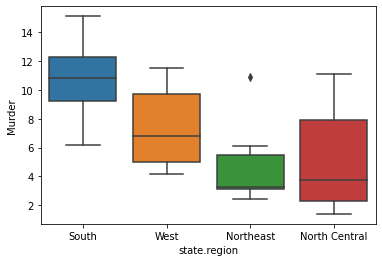

In [236]:
sns.boxplot( y=statedata["Murder"], x=statedata["state.region"] );
plt.show()

We see that there is an outlier in the Northeast region of the boxplot generated. We try to find which state does this correspond to. For this we make a subset of the Northeast region.

In [237]:
Northeast = statedata[statedata["state.region"] == 'Northeast']

In [238]:
Northeast

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
6,3100,5348,1.1,72.48,3.1,56.0,139,4862,CT,5009,-72.3573,41.5928,New England,Connecticut,Northeast
18,1058,3694,0.7,70.39,2.7,54.7,161,30920,ME,33215,-68.9801,45.6226,New England,Maine,Northeast
20,5814,4755,1.1,71.83,3.3,58.5,103,7826,MA,8257,-71.5800,42.3645,New England,Massachusetts,Northeast
28,812,4281,0.7,71.23,3.3,57.6,174,9027,NH,9304,-71.3924,43.3934,New England,New Hampshire,Northeast
29,7333,5237,1.1,70.93,5.2,52.5,115,7521,NJ,7836,-74.2336,39.9637,Middle Atlantic,New Jersey,Northeast
31,18076,4903,1.4,70.55,10.9,52.7,82,47831,NY,49576,-75.1449,43.1361,Middle Atlantic,New York,Northeast
37,11860,4449,1.0,70.43,6.1,50.2,126,44966,PA,45333,-77.4500,40.9069,Middle Atlantic,Pennsylvania,Northeast
38,931,4558,1.3,71.90,2.4,46.4,127,1049,RI,1214,-71.1244,41.5928,New England,Rhode Island,Northeast
44,472,3907,0.6,71.64,5.5,57.1,168,9267,VT,9609,-72.5450,44.2508,New England,Vermont,Northeast


In [239]:
Northeast.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,9.0,5495.111111,6079.565146,472.0000,931.0000,3100.0000,7333.0000,18076.0000
Income,9.0,4570.222222,559.077092,3694.0000,4281.0000,4558.0000,4903.0000,5348.0000
Illiteracy,9.0,1.000000,0.278388,0.6000,0.7000,1.1000,1.1000,1.4000
Life.Exp,9.0,71.264444,0.743877,70.3900,70.5500,71.2300,71.8300,72.4800
Murder,9.0,4.722222,2.670570,2.4000,3.1000,3.3000,5.5000,10.9000
HS.Grad,9.0,53.966667,3.928104,46.4000,52.5000,54.7000,57.1000,58.5000
Frost,9.0,132.777778,30.894084,82.0000,115.0000,127.0000,161.0000,174.0000
Area,9.0,18141.000000,18075.689364,1049.0000,7521.0000,9027.0000,30920.0000,47831.0000
state.area,9.0,18817.000000,18589.054602,1214.0000,7836.0000,9304.0000,33215.0000,49576.0000
x,9.0,-72.756411,2.507219,-77.4500,-74.2336,-72.3573,-71.3924,-68.9801


In [240]:
Northeast[Northeast["Murder"] == Northeast["Murder"].max()]

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
31,18076,4903,1.4,70.55,10.9,52.7,82,47831,NY,49576,-75.1449,43.1361,Middle Atlantic,New York,Northeast


# Predicting Life Expectancy - An Initial Model
We would like to build a model to predict life expectancy by state using the state statistics we have in our dataset.

We build our initial model with all potential variables included (Population, Income, Illiteracy, Murder, HS.Grad, Frost, and Area)

In [241]:
LESubset = statedata[['Population', 'Income', 'Illiteracy', 'Murder', 'HS.Grad', 'Frost', 'Area', 'Life.Exp']]

In [242]:
LESubset.head()

,Population,Income,Illiteracy,Murder,HS.Grad,Frost,Area,Life.Exp
0,3615,3624,2.1,15.1,41.3,20,50708,69.05
1,365,6315,1.5,11.3,66.7,152,566432,69.31
2,2212,4530,1.8,7.8,58.1,15,113417,70.55
3,2110,3378,1.9,10.1,39.9,65,51945,70.66
4,21198,5114,1.1,10.3,62.6,20,156361,71.71


In [243]:
X = LESubset.iloc[:, :-1].values
y = LESubset.iloc[:, -1].values

In [244]:
LETrend = LinearRegression()
LETrend.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [245]:
LETrend.score(X,y)

0.736156268908904

In [246]:
print('Intercept: ', LETrend.intercept_)

Intercept:  70.94322411112941


What is the coefficient for "Income" in your linear regression model? To find this we call the coefficient for all columns. 

In [247]:
cols = ['Population', 'Income', 'Illiteracy', 'Murder', 'HS.Grad', 'Frost', 'Area']

In [248]:
list(zip(cols,LETrend.coef_))

[('Population', 5.180036383483333e-05),
 ('Income', -2.1804237825283393e-05),
 ('Illiteracy', 0.0338203213552914),
 ('Murder', -0.30112317045182935),
 ('HS.Grad', 0.04892947888171683),
 ('Frost', -0.00573500110355544),
 ('Area', -7.383166144891658e-08)]

What is the interpretation of the coefficient x? x = -2.1804237825283393e-05
{For a one unit increase in income, predicted life expectancy decreases by |x|}

To verify this we plot a graph of life expectancy vs. income.

Visually observing the plot, Life expectancy is somewhat positively correlated with income.

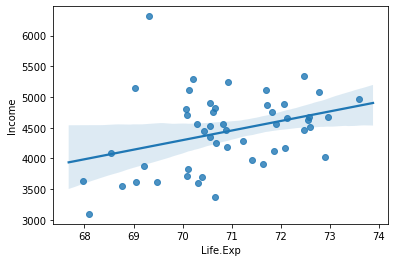

In [249]:
sns.regplot(x='Life.Exp', y='Income', data = LESubset)

The model we built does not display the relationship we saw from the plot of life expectancy vs. income. This is due to Multicollinearity.

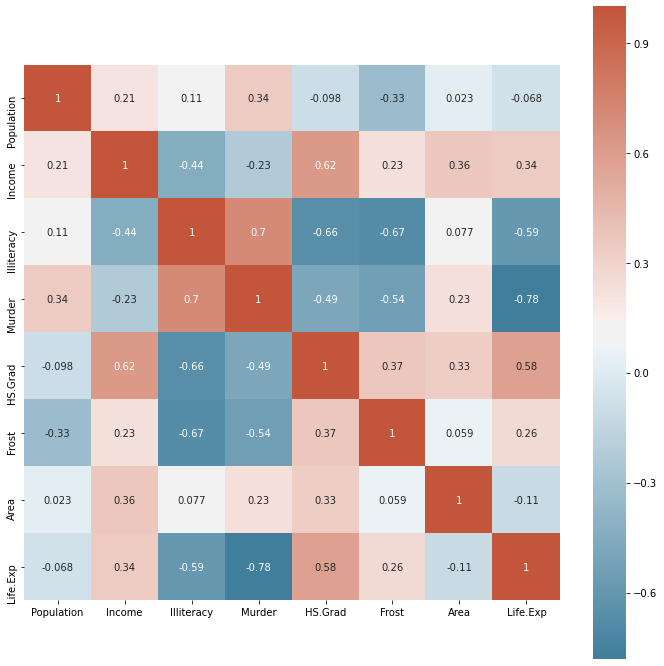

In [250]:
cmap = sns.diverging_palette(230, 20, as_cmap = True)
plt.subplots(figsize=(12,12))
sns.heatmap(LESubset.corr(), annot = True, cmap = cmap, square = True)

In [251]:
est = sm.OLS(y, X)

In [252]:
est2 = est.fit()

In [253]:
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              1641.
Date:                Sun, 21 Mar 2021   Prob (F-statistic):                    4.78e-50
Time:                        01:11:32   Log-Likelihood:                         -144.21
No. Observations:                  50   AIC:                                      302.4
Df Residuals:                      43   BIC:                                      315.8
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Refining the Model and Analyzing Predictions
Following the principle of simplicity: that is, a model with fewer variables is preferable to a model with many unnnecessary variables. We experiment with removing independent variables from the original model. we use the significance of the coefficients to decide which variables to remove (remove the one with the largest "p-value" first, or the one with the "t value" closest to zero), and to remove them one at a time (this is called "backwards variable selection"). This is important due to multicollinearity issues - removing one insignificant variable may make another previously insignificant variable become significant.

In [254]:
LESubset1 = statedata[['Population', 'Income', 'Illiteracy', 'Murder', 'HS.Grad', 'Frost', 'Life.Exp']]

In [255]:
X = LESubset1.iloc[:, :-1].values
y = LESubset1.iloc[:, -1].values

In [256]:
LETrend1 = LinearRegression()
LETrend1.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [257]:
LETrend1.score(X,y)

0.736143963220925

In [258]:
print('Intercept: ', LETrend1.intercept_)

Intercept:  70.98931851760156


In [259]:
print('Coefficients: ', LETrend1.coef_)

Coefficients:  [ 5.18826954e-05 -2.44403026e-05  2.84588124e-02 -3.01823139e-01
  4.84723220e-02 -5.77575821e-03]


In [260]:
est = sm.OLS(y, X)

In [261]:
est2 = est.fit()

In [262]:
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              1271.
Date:                Sun, 21 Mar 2021   Prob (F-statistic):                    1.34e-47
Time:                        01:11:39   Log-Likelihood:                         -154.99
No. Observations:                  50   AIC:                                      322.0
Df Residuals:                      44   BIC:                                      333.4
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [263]:
LESubset2 = statedata[['Population', 'Income', 'Murder', 'HS.Grad', 'Frost', 'Life.Exp']]

In [264]:
X = LESubset2.iloc[:, :-1].values
y = LESubset2.iloc[:, -1].values

In [265]:
LETrend2 = LinearRegression()
LETrend2.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [266]:
est = sm.OLS(y, X)

In [267]:
est2 = est.fit()

In [268]:
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              878.0
Date:                Sun, 21 Mar 2021   Prob (F-statistic):                    1.19e-43
Time:                        01:11:43   Log-Likelihood:                         -169.24
No. Observations:                  50   AIC:                                      348.5
Df Residuals:                      45   BIC:                                      358.0
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

We try to find a good model with only 4 independent variables, instead of the original 7, with variables Population, Murder, Frost, HS.Grad.

In [269]:
cols = ['Population', 'Murder', 'Frost', 'HS.Grad']

In [270]:
LESubset3 = statedata[['Population', 'Murder', 'Frost','HS.Grad', 'Life.Exp']]

In [271]:
X = LESubset3.iloc[:, :-1].values
y = LESubset3.iloc[:, -1].values

In [272]:
LETrend3 = LinearRegression()
LETrend3.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [273]:
est = sm.OLS(y, X)

In [274]:
est2 = est.fit()

In [275]:
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              984.5
Date:                Sun, 21 Mar 2021   Prob (F-statistic):                    6.48e-44
Time:                        01:11:49   Log-Likelihood:                         -172.47
No. Observations:                  50   AIC:                                      352.9
Df Residuals:                      46   BIC:                                      360.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Using the simplified 4 variable model that we created, we'll now take a look at how our predictions compare to the actual values.



Take a look at the vector of predictions by using the predict function (since we are just looking at predictions on the training set, you don't need to pass a "newdata" argument to the predict function).

In [276]:
PredTest = LinearRegression()
PredTest = LETrend3.predict(X)

In [277]:
PredTest

array([68.48111866, 69.85740399, 71.41415671, 69.57373881, 71.79564599,
       71.10354184, 72.03458972, 71.12646884, 70.61539495, 68.63694227,
       72.09316854, 71.49989286, 70.1924416 , 70.90158526, 72.39652876,
       71.90351963, 69.24417933, 69.15044846, 71.86095411, 70.51851996,
       72.44105391, 69.8689336 , 72.2655962 , 69.00535384, 70.10610031,
       71.40024805, 72.17032309, 69.52482393, 71.72635615, 71.59612086,
       70.03119055, 70.62937149, 69.28624179, 71.8764945 , 71.08548767,
       71.15860042, 72.41445333, 71.38045527, 71.76007018, 69.06109172,
       72.01160881, 69.46583349, 69.97885943, 72.05753183, 71.06134981,
       70.14691392, 72.68272426, 70.44982588, 72.00995676, 70.87678863])

Which state do we predict to have the lowest life expectancy?

In [278]:
statedata[PredTest == PredTest.min()]

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,Alabama,South


Which state actually has the lowest life expectancy?

In [279]:
statedata[statedata["Life.Exp"] == statedata["Life.Exp"].min()]

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
39,2816,3635,2.3,67.96,11.6,37.8,65,30225,SC,31055,-80.5056,33.619,South Atlantic,South Carolina,South


Which state do we predict to have the highest life expectancy?

In [280]:
statedata[PredTest == PredTest.max()]

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
46,3559,4864,0.6,71.72,4.3,63.5,32,66570,WA,68192,-119.746,47.4231,Pacific,Washington,West


Which state actually has the highest life expectancy?

In [281]:
statedata[statedata["Life.Exp"] == statedata["Life.Exp"].max()]

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
10,868,4963,1.9,73.6,6.2,61.9,0,6425,HI,6450,-126.25,31.75,Pacific,Hawaii,West


We take a look at the vector of residuals (the difference between the predicted and actual values).

In [286]:
 residual = statedata["Life.Exp"].values - PredTest

In [287]:
residual

array([ 0.56888134, -0.54740399, -0.86415671,  1.08626119, -0.08564599,
        0.95645816,  0.44541028, -1.06646884,  0.04460505, -0.09694227,
        1.50683146,  0.37010714, -0.0524416 , -0.02158526,  0.16347124,
        0.67648037,  0.85582067, -0.39044846, -1.47095411, -0.29851996,
       -0.61105391,  0.7610664 ,  0.6944038 , -0.91535384,  0.58389969,
       -0.84024805,  0.42967691, -0.49482393, -0.49635615, -0.66612086,
        0.28880945, -0.07937149, -0.07624179,  0.9035055 , -0.26548767,
        0.26139958, -0.28445333, -0.95045527,  0.13992982, -1.10109172,
        0.06839119,  0.64416651,  0.92114057,  0.84246817,  0.57865019,
       -0.06691392, -0.96272426, -0.96982588,  0.47004324, -0.58678863])

For which state do we make the smallest absolute error?

In [288]:
statedata[residual == residual.min()]

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
18,1058,3694,0.7,70.39,2.7,54.7,161,30920,ME,33215,-68.9801,45.6226,New England,Maine,Northeast


For which state do we make the largest absolute error?

In [289]:
statedata[residual == residual.max()]

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
10,868,4963,1.9,73.6,6.2,61.9,0,6425,HI,6450,-126.25,31.75,Pacific,Hawaii,West
